In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [3]:
pok = pd.read_csv('pokemon.csv')
pok.shape

(807, 14)

In [4]:
pok.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


it appear that 'generation_id' is categorical variable so we will us 'Bar chart'

##### seaborn code for bar chart
seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)

###### color_palette() is function that return a list of tuples corrosponding to the color palette in the argument of the function 

   default palette as a list of RGB tuples. 
    Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
   Choose the first tuple of RGB colors

if i want one color i will slice off index(0) to get 1st tuple in the list then store it in a variable and put it in countplot()
function in colot 

###### to sort the data  using the order argument of the countplot() function.



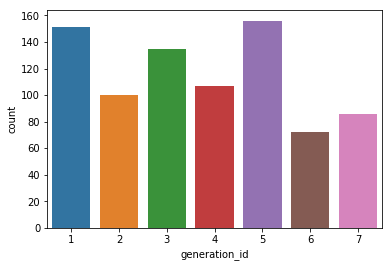

In [5]:
sb.countplot(data = pok, x ='generation_id' )

In [6]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [33]:
base_color = sb.color_palette()[7]

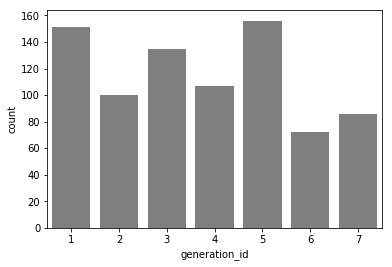

In [34]:
sb.countplot(data = pok, x ='generation_id', color = base_color )

use one color due to distraction 

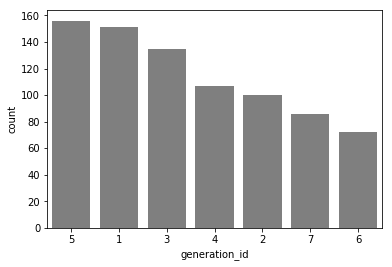

In [36]:
### now we want to get them in order programtically 
# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
freq = pok['generation_id'].value_counts()

# Get the indexes of the Series
gen_order = freq.index


#or

gen_order = pok['generation_id'].value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=pok, x='generation_id', color=base_color, order=gen_order)

### Rotate the category labels (not axes)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

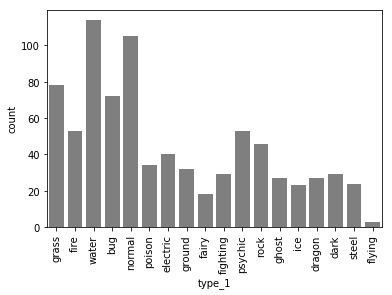

In [38]:
# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pok, x='type_1', color=base_color);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90)

### Rotate the axes clockwise


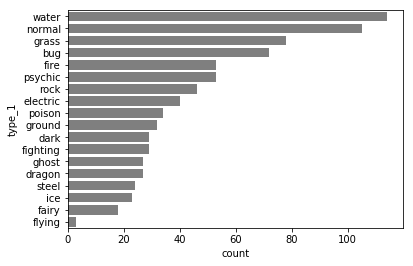

In [39]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pok['type_1'].value_counts().index
sb.countplot(data=pok, y='type_1', color=base_color, order=type_order);

#### Bar Chart using the Matplotlib

matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None)


we will use Series.value_counts() to extract a Series from the given DataFrame object.


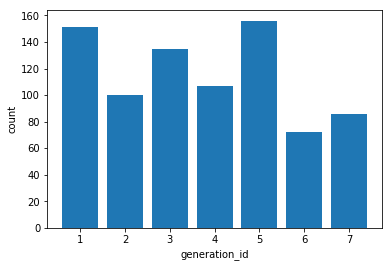

In [40]:
# Return the Series having unique values
x = pok['generation_id'].unique()

# Return the Series having frequency count of each unique value
y = pok['generation_id'].value_counts(sort=False)

plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

# Absolute vs. Relative Frequency


# Data Wrangling Step
pandas.DataFrame.melt() method to unpivot a DataFrame from wide to long format, optionally leaving identifiers set

DataFrame.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)

id_vars - It is a tuple representing the column(s) to use as identifier variables.

value_vars - It is tuple representing the column(s) to unpivot (remove, out of place).

var_name - It is a name of the new column.

value_name - It is a name to use for the ‘value’ of the columns that are unpivoted.

In [41]:
pok_types = pok.melt(id_vars=['id', 'species'], 
                          value_vars=['type_1', 'type_2'], 
                          var_name='type_level', 
                          value_name='type')
pok_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [43]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pok_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [44]:
# Get the unique values of the `type` column, in the decreasing order of the frequency.#to get the order 
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'steel', 'fairy',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

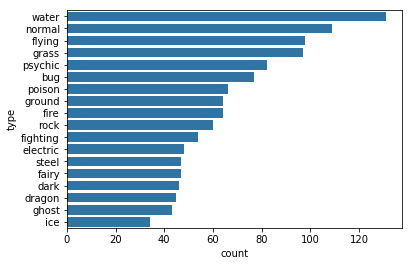

In [45]:
base_color = sb.color_palette()[0]
sb.countplot(data=pok_types, y='type', color=base_color, order=type_order);

# Example 2. Plot a bar chart having the proportions, instead of the actual count, on one of the axe

Step 1. Find the maximum proportion of bar


In [48]:
# Returns the sum of all not-null values in `type` column
n_pokemon = pok_types['type'].value_counts().sum()
n_pokemon

1212

In [50]:
# Return the highest frequency in the `type` column
max_type_count = type_counts[0]
max_type_count

131

In [51]:
# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


Example 2 - Step 2. Create an array of evenly spaced proportioned values

We need x-tick labels that must be evenly spaced on the x-axis. For this purpose, we must have a list of labels ready with us, before using it with plt.xticks() function.

In [52]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

 Step 3. Create a list of String values that can be used as tick labels.


In [53]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

Example 2 - Step 4. Plot the bar chart, with new x-tick labels


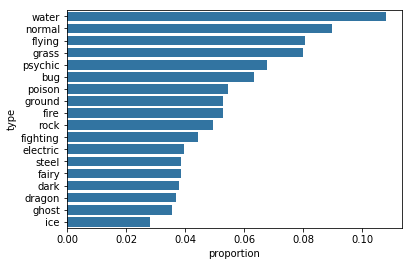

In [55]:
sb.countplot(data=pok_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

# Example 3. Print the text (proportion) on the bars of a horizontal plot.

Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.


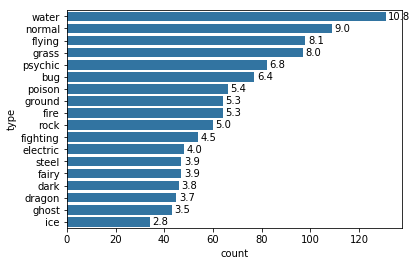

In [57]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pok_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

# Example 4. Print the text (proportion) below the bars of a Vertical plot.


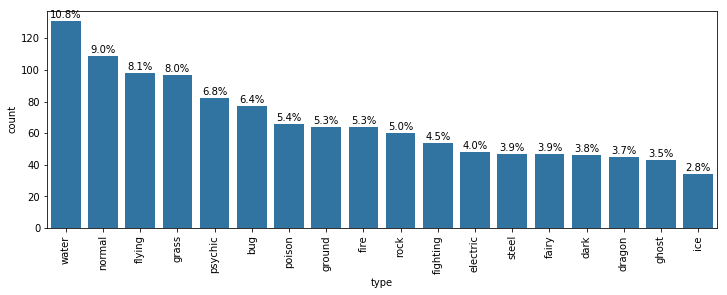

In [59]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pok_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pok_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')



I use the .get_text() method to obtain the category name, so I can get the count of each category level. At the end, I use the text function to print each percentage, with the x-position, y-position, and string as the three main parameters to the function.


Tip - Is the text on the bars not readable clearly? Consider changing the size of the plot by using the following:

In [62]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4


# Missing values 
What if we want to visualize these missing value counts?
One interesting way we can apply bar charts is through the visualization of missing data. We could treat the variable names as levels of a categorical variable, and create a resulting bar plot. However, since the data is not in its tidy, unsummarized form, we need to make use of a different plotting function. Seaborn's barplot function is built to depict a summary of one quantitative variable against levels of a second, qualitative variable, but can be used here.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the data from a CSV file
sales_data = pd.read_csv('sales-data.csv')
sales_data.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,02/04/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,09/04/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [4]:
# sales_data.isna()
#sales_data.isnull()
sales_data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

#### Step 2 - Prepare a NaN tabular data


In [5]:
# Let's drop the column that do not have any NaN/None values
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis=1).isna().sum()
print(na_counts)

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


####  Step 3 - Plot the bar chart from the NaN tabular data, and also print values on each bar
Use seaborn.barplot()


In [ ]:
# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
# Refer to the syntax and more example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
sb.barplot(na_counts.index.values, na_counts)

# get the current tick locations and labels
plt.xticks(rotation=90) 

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+300, count, ha = 'center', va='top')